**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 09: Procesamiento morfológico
```

**Integrantes**

1.

2.

3.

4.
 

### 1. Aplique las operaciones morfologicas de: Dilatación, erosión, apertura y cierre a la imagen broken. png
* La imagen debe ser previamente convertida a escala de grises, y binarizada usando un umbral de 128
* Experimente con distintos elementos estructurantes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

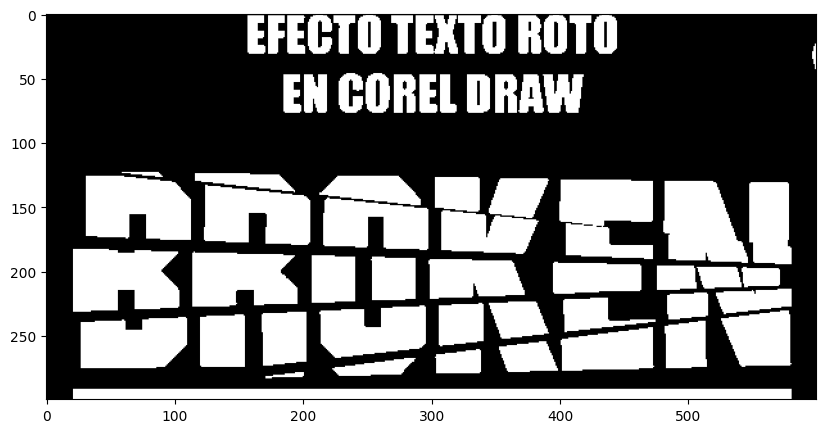

In [2]:
img = cv2.imread("lab_images/broken.png",0)
img = np.uint8(img > 128)

plt.subplots(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
selem3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

img_dil = cv2.dilate(img, selem2, iterations = 2)
img_ero = cv2.erode(img, selem2, iterations = 3)
img_ope = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem2)
img_clo = cv2.morphologyEx(img, cv2.MORPH_CLOSE, selem2)

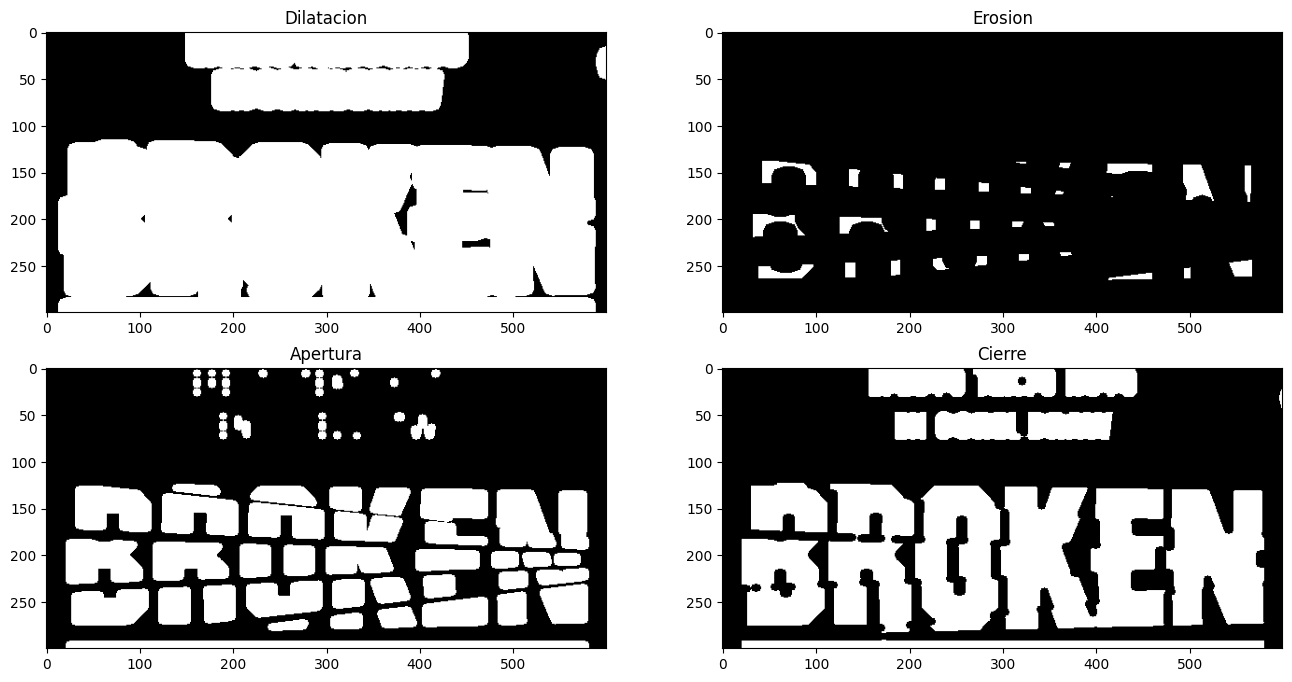

In [4]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
plt.subplot(221)
plt.imshow(img_dil, cmap="gray")
plt.title("Dilatacion")
plt.subplot(222)
plt.imshow(img_ero, cmap="gray")
plt.title("Erosion")
plt.subplot(223)
plt.imshow(img_ope, cmap="gray")
plt.title("Apertura")
plt.subplot(224)
plt.imshow(img_clo, cmap="gray")
plt.title("Cierre")
plt.show()

```
1. Tiene algún efecto la forma y tamaño del elemento estructurante en las operaciones de morfología?

2. En que situaciones usaría una apertura y un cierre? 

### 2. 1. Aplique las operaciones morfologicas de  Black y White Top Hat implementadas en OpenCV  a "Cosmos.jpg"

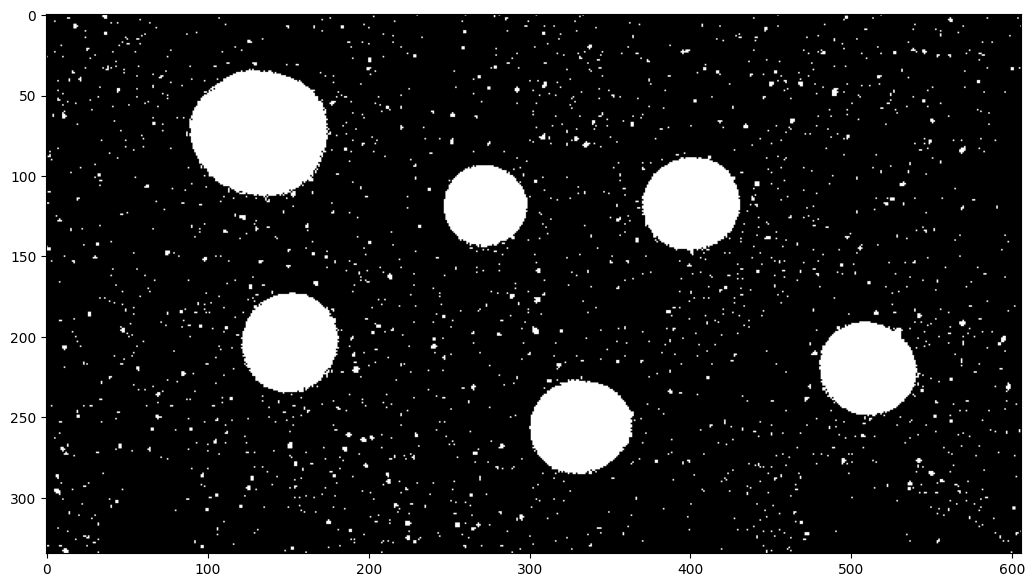

In [3]:
img = cv2.imread("lab_images/Cosmos.jpg",0)
img = np.uint8(img > 128)

plt.subplots(figsize=(15,7))
plt.imshow(img, cmap="gray")
plt.show()

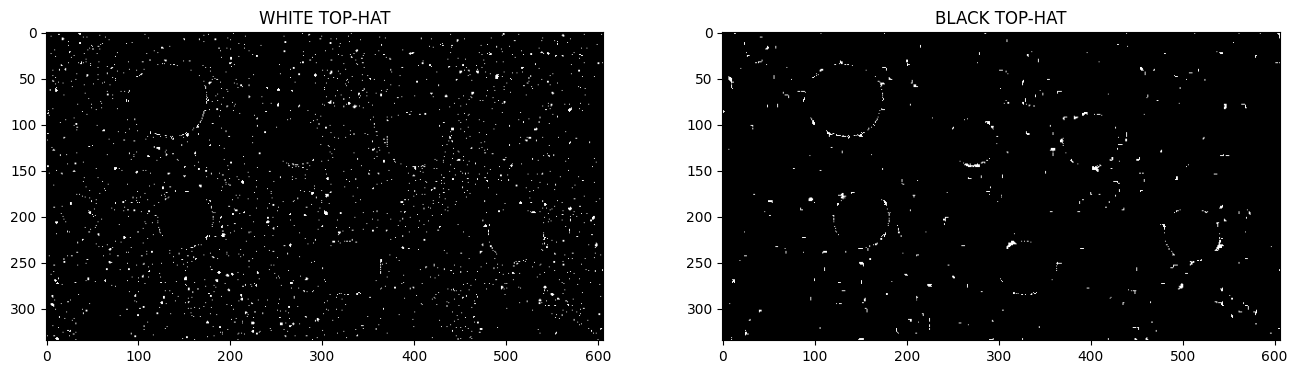

In [10]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, selem1)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, selem1)

plt.subplots(1,2,figsize=(16,4))
plt.subplot(121)
plt.imshow(tophat, cmap="gray")
plt.title("WHITE TOP-HAT")
plt.subplot(122)
plt.imshow(blackhat, cmap="gray")
plt.title("BLACK TOP-HAT")
plt.show()

```
3. Cual es la diferencia entre white top-hat y black top-hat?

### 3. En la imagen cuadros.png use la transformacion de acierto y falla para marcar la esquina superior izquerda de cada cuadrilatero
* Reporte el total de cuadrilateros en la imagen
* Compruebe el funcionamiento del algoritmo usando la imagen cuadrosT.png

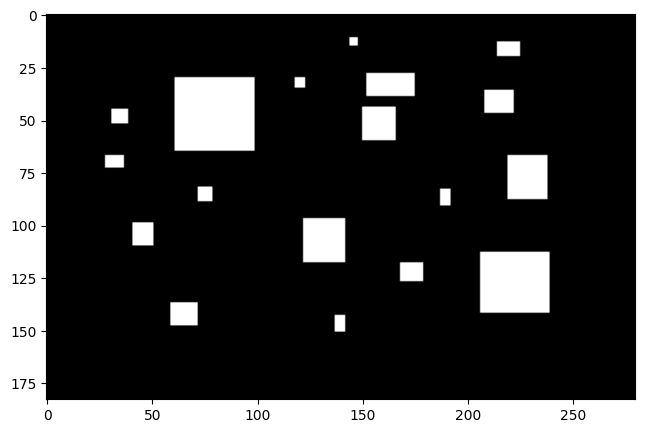

In [4]:
img = cv2.imread("lab_images/cuadros.png",0)
img = np.uint8(img>128)
plt.subplots(figsize = (10,5))
plt.imshow(img, cmap="gray")
plt.show()

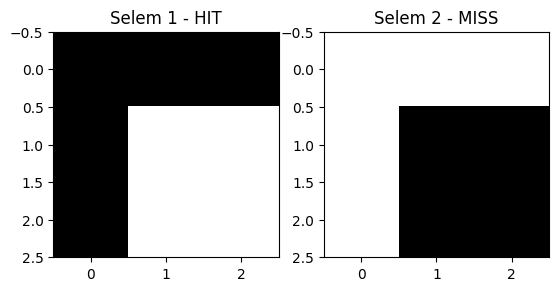

In [6]:
selem1=np.array([[0,0,0],[0,1,1],[0,1,1]], dtype=np.uint8)  #HIT
selem2=np.array([[1,1,1],[1,0,0],[1,0,0]], dtype=np.uint8)  #MISS

plt.subplot(1,2,1)
plt.imshow(selem1, cmap="gray")
plt.title("Selem 1 - HIT")
plt.subplot(1,2,2)
plt.imshow(selem2, cmap="gray")
plt.title("Selem 2 - MISS")
plt.show()

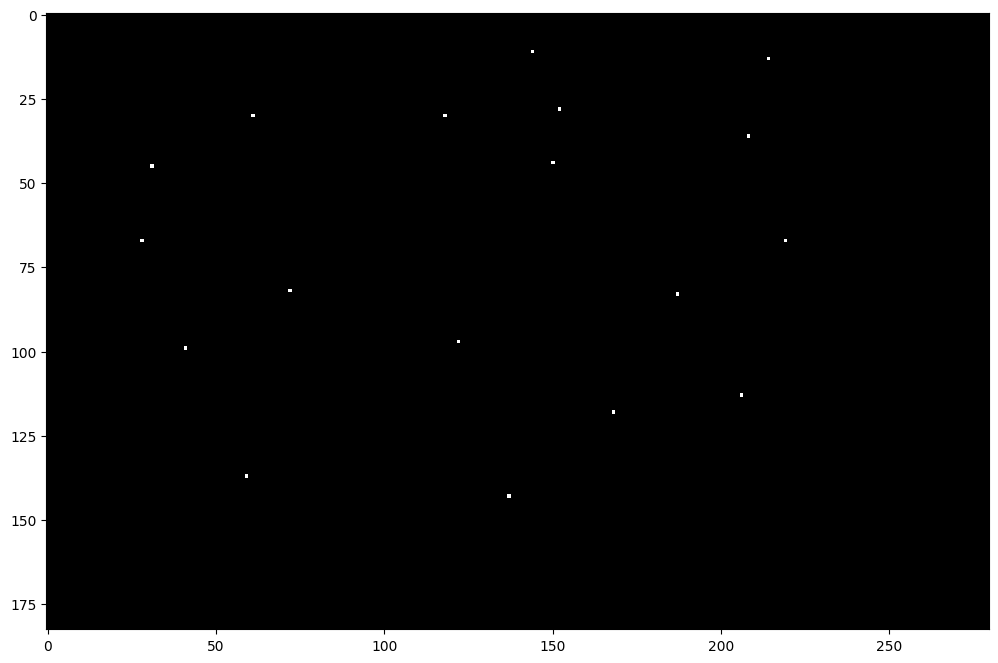

18 Cuadrados


In [7]:
img_ero_hit = cv2.erode(img, selem1)
img_ero_miss = cv2.erode(1-img, selem2)

res= cv2.bitwise_and(img_ero_hit,img_ero_miss)
plt.subplots(figsize=(18,8))
plt.imshow(res, cmap="gray")
plt.show()

print(np.sum(res), "Cuadrados")

```
4. Cree que esta transformación serviría para encontrar los rectángulos si estos estuviesen girados?

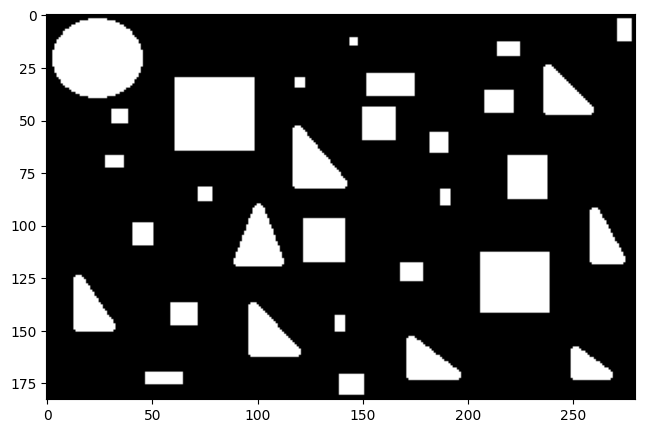

In [8]:
#COMPROBANDO EN CUADROS T
img2 = cv2.imread("lab_images/cuadrosT.png",0)
img2 = np.uint8(img2>128)
plt.subplots(figsize = (10,5))
plt.imshow(img2, cmap="gray")
plt.show()

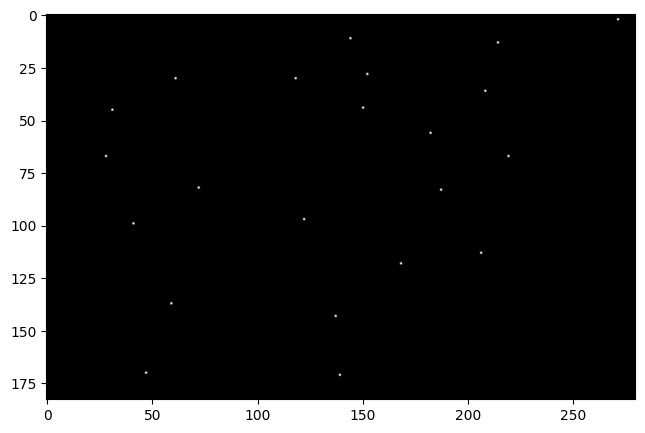

22 Cuadrilateros


In [9]:
img_ero_hit = cv2.erode(img2, selem1, iterations = 1)
img_ero_miss = cv2.erode(1-img2, selem2, iterations = 1)

res= img_ero_hit * img_ero_miss
plt.subplots(figsize=(12,5))
plt.imshow(res, cmap="gray")
plt.show()

print(np.sum(res), "Cuadrilateros")

### 4. Encuentre el borde de una imagen utilizando el gradiente morfológico
* Dilatación - erosión

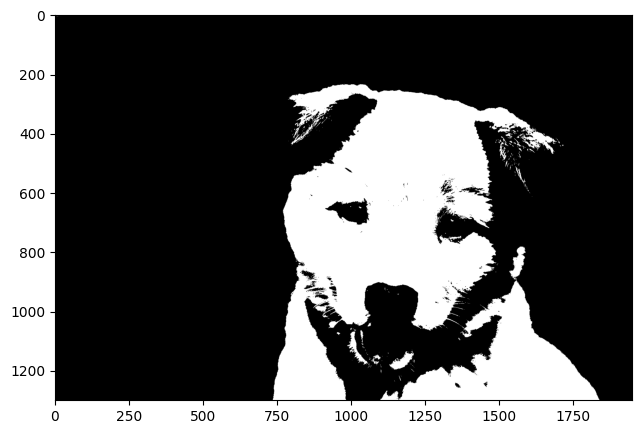

In [10]:
img = cv2.imread("lab_images/puppy.jpg",0)
img = np.uint8(img>80)
plt.subplots(figsize = (10,5))
plt.imshow(img, cmap="gray")
plt.show()

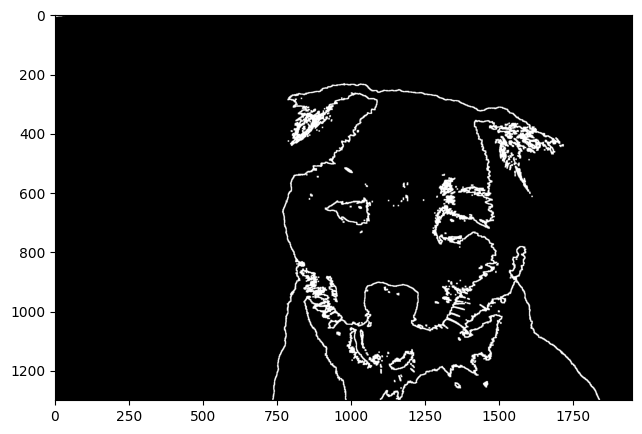

In [18]:
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, selem1)

plt.subplots(figsize = (10,5))
plt.imshow(gradient, cmap="gray")
plt.show()

```
5. Que pasa si el elemento estructurante es de 11x11?

### 5. Implemente un algoritmo para encontrar los puntos finales de la figura lineas.png
* Reutilize la funcion filtro_espacial elaborado en el laboratorio 2

In [19]:
def filtro_espacial(imagen,selem):
    M,N=imagen.shape
    m,n=selem.shape

    nueva_imagen=np.zeros((M+m-1,N+n-1)) #Imagen con filas y columnas extra

    cm=np.uint16((m-1)/2)
    cn=np.uint16((n-1)/2)

    nueva_imagen[cm:cm+M,cn:cn+N]=imagen

    salida=np.zeros((nueva_imagen.shape))

    for i in np.uint16(np.arange(cm,cm+M)):
        for j in np.uint16(np.arange(cn,cn+N)):

            seccion_imagen=nueva_imagen[i-cm:i+cm+1,j-cn:j+cn+1]
            result_seccion=seccion_imagen*selem
            score=np.sum(result_seccion)

            if(nueva_imagen[i,j]==1):
                if (score==2):
                    salida[i,j]=1
                else:
                    salida[i,j]=0
            else:
                salida[i,j]=0

    #recortar del mismo tamaño
    result_img=salida[cm:cm+M,cn:cn+N]

    return result_img

```
6. Por qué es necesario verificar que score==2 en el algoritmo anterior?

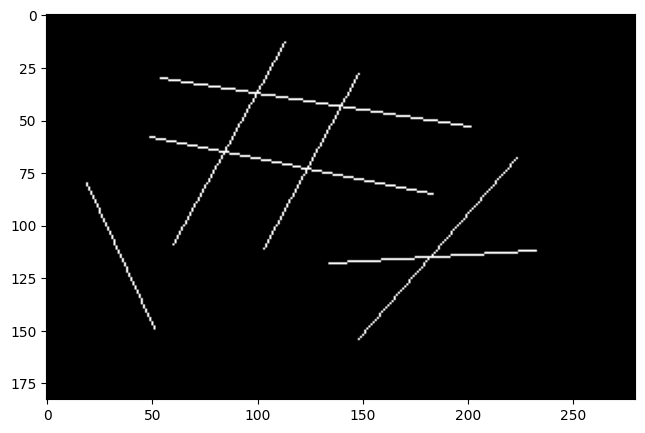

In [21]:
img3=cv2.imread("lab_images/lineas1.png",0)
img3=img3>128

plt.subplots(figsize=(10,5))
plt.imshow(img3, cmap="gray")
plt.show()

In [23]:
selem=np.array([[1,1,1],[1,1,1],[1,1,1]])
img3_final_points=filtro_espacial(img3,selem)

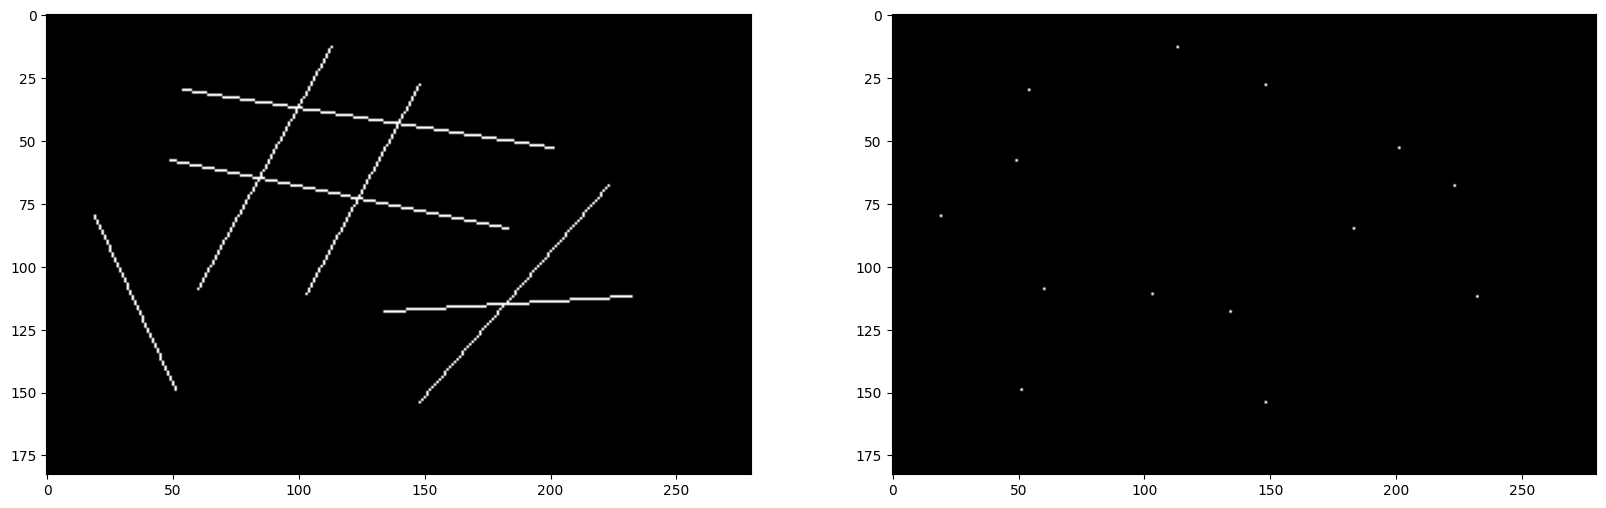

In [24]:
plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
plt.imshow(img3, cmap="gray")
plt.subplot(122)
plt.imshow(img3_final_points, cmap="gray")
plt.show()

### 6. Adelgazamiento y esqueletización de una imagen binaria
* Trabaje con la imagen huella.jpg, muestre una imagen comparativa de sus resultados

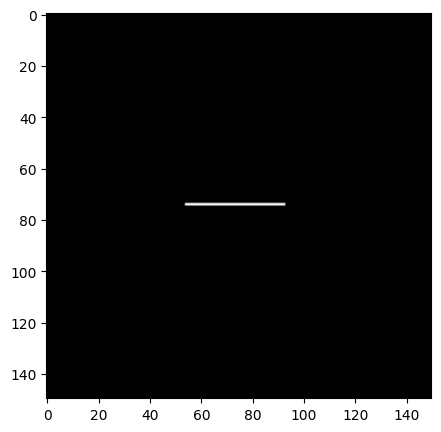

In [26]:
#Adelgazamiento
img = cv2.imread("lab_images/im1.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

thinned = cv2.ximgproc.thinning(img)

plt.subplots(figsize=(10,5))
plt.imshow(thinned, cmap="gray")
plt.show()

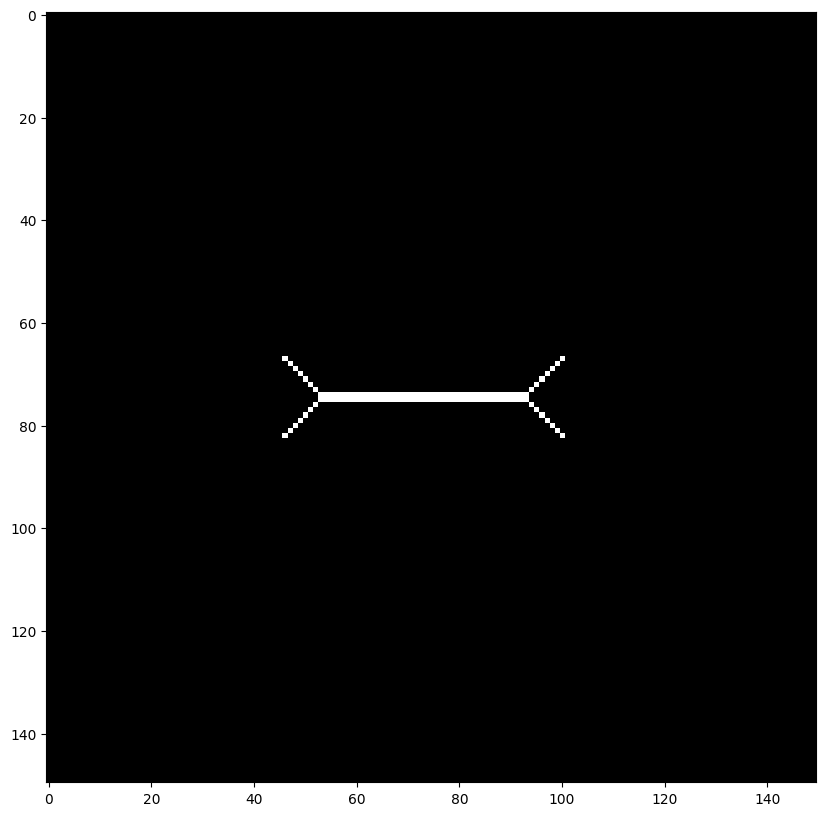

In [11]:
#Skel
img = cv2.imread("lab_images/im1.png", 0)

_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

skel = np.zeros(img.shape, np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded = cv2.erode(img, element)
    opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(eroded, opened)
    skel = cv2.bitwise_or(skel,temp)

    img = eroded.copy()

    if cv2.countNonZero(img)==0:
        break

plt.subplots(figsize=(18,10))
plt.imshow(skel, cmap="gray")
plt.show()

```
7. Despues de aplicar el algoritmo de skel y el de adelgazamiento sobre una misma imágen. Son estas operaciones iguales?

### 7. Etiquete la imagen form.png y muestre aisladamente una de las formas


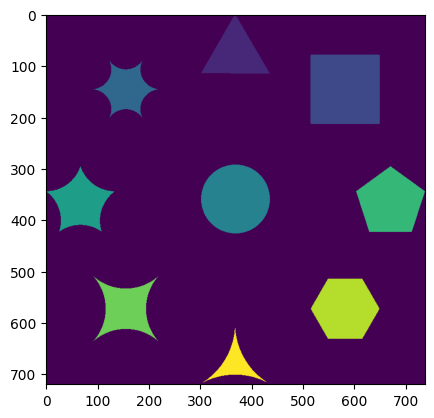

10


In [20]:
img = cv2.imread("lab_images/form.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

num_labels, labels_im = cv2.connectedComponents(img, connectivity=8)

plt.imshow(labels_im)
plt.show()
print(num_labels)

```
8. Cuál es la función del parámetro connectivity?

In [30]:
print(labels_im[300:400, 300:400])

[[0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]]


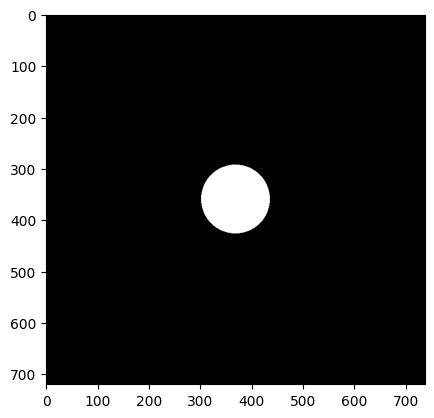

10


In [21]:
plt.imshow(labels_im==4, cmap="gray")
plt.show()
print(num_labels)

### 8. Con la imagen "mark.png" realize la Reconstruccion de las 3 formas correspondientes

In [23]:
def reconstruccion_morf(img, marcador, selem):
    while True:
        dilate = cv2.dilate(marcador, selem)
        reconstruida = cv2.bitwise_and(dilate, img)

        if np.array_equal(marcador, reconstruida):
            return reconstruida
        else:
            marcador = reconstruida

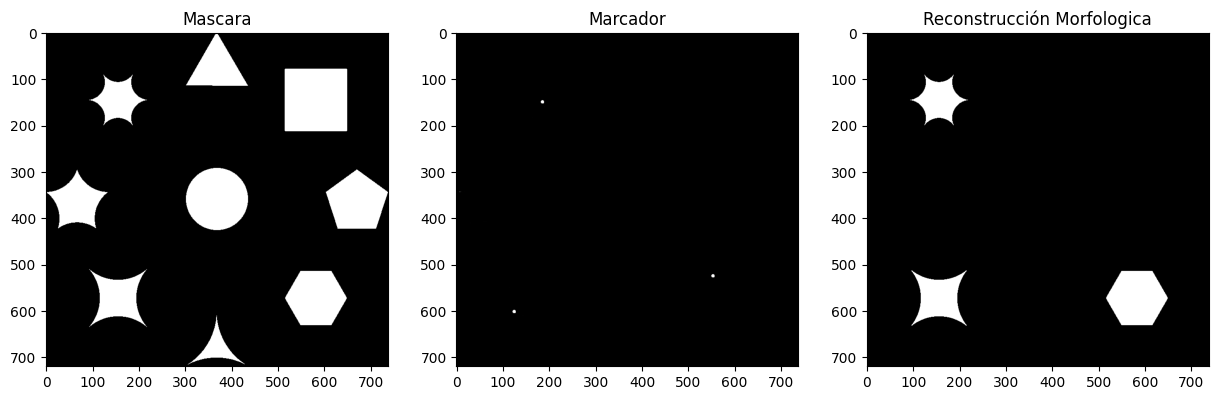

In [27]:
img = cv2.imread("lab_images/form.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

marker = cv2.imread("lab_images/mark.png",0)
_,marker0 = cv2.threshold(marker, 127, 255, cv2.THRESH_BINARY)

selem = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

reconstruida = reconstruccion_morf(img, marker0, selem)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Mascara")
plt.subplot(1,3,2)
plt.imshow(marker, cmap="gray")
plt.title("Marcador")
plt.subplot(1,3,3)
plt.imshow(reconstruida, cmap="gray")
plt.title("Reconstrucción Morfologica")
plt.show()


```
9. Si usted tuviera un conjunto de elementos de igual forma pero diferente tamaño, en el que usted quiere únicamente los mas grandes sin ningún tipo de modificación, describa la secuencia de pasos para lograr este objetivo usuando únicamente operaciones de morfología? (el tamaño de los objetos seleccionados debe ser el mismo)

### 9. implemente el algoritmo llenado de huecos descrito en la clase teorica, luego apliquela a la imagen latas1.jpg
* Binarize con un umbral de 40 y haga una apertura con un selem de radio 3
* g= -(reconstruccion(fm,~f ))
* fm ={1 - f ; solo si el pixel pertenece al borde

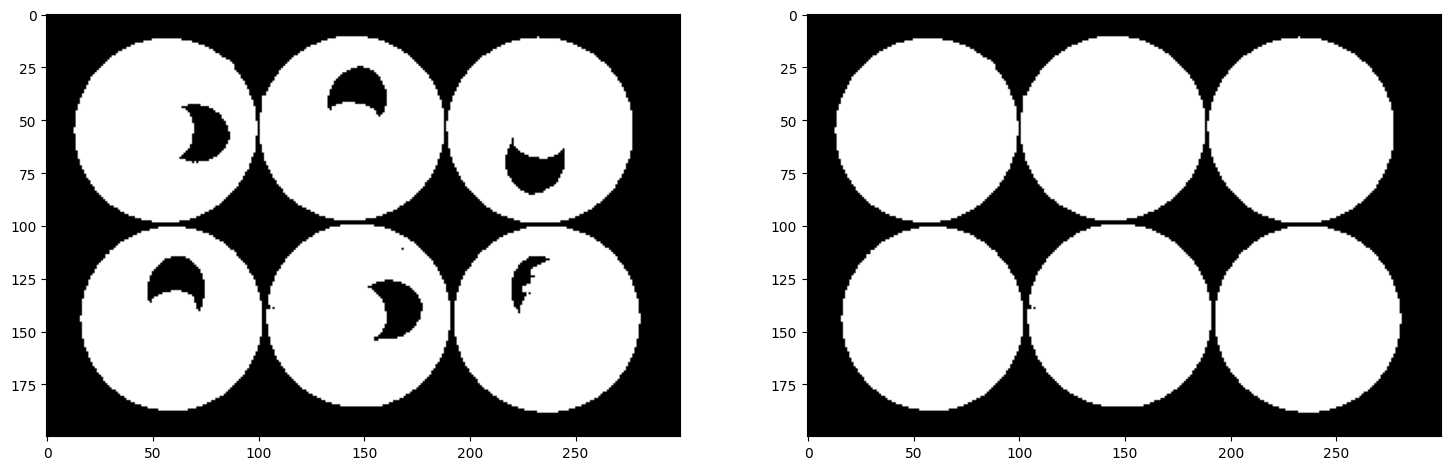

In [40]:
img = cv2.imread("lab_images/latas1.jpg",0)
_,img = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem)  #Para limpiar ruido

marker=np.zeros(img.shape, dtype=np.uint8)
marker[0,:] = ~img_open[0,:]
marker[-1,:] = ~img_open[-1,:]
marker[:,0] = ~img_open[:,0]
marker[:,-1] = ~img_open[:,-1]

img_recons = reconstruccion_morf(~img_open, marker, selem)

g = cv2.bitwise_not(img_recons)

plt.subplots(1,2,figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(img_open, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(g, cmap="gray")
plt.show()

### 10. De la imagen comp2.jpg intente obtener solo los integrados, y luego limpie aquellos que estan pegados al borde de la imagen
* Binarize con un umbral de 80 y haga una apertura con un selem de radio 3
* g= -(reconstruccion(fm,~f ))
* fm ={1 - f ; solo si el pixel pertenece al borde

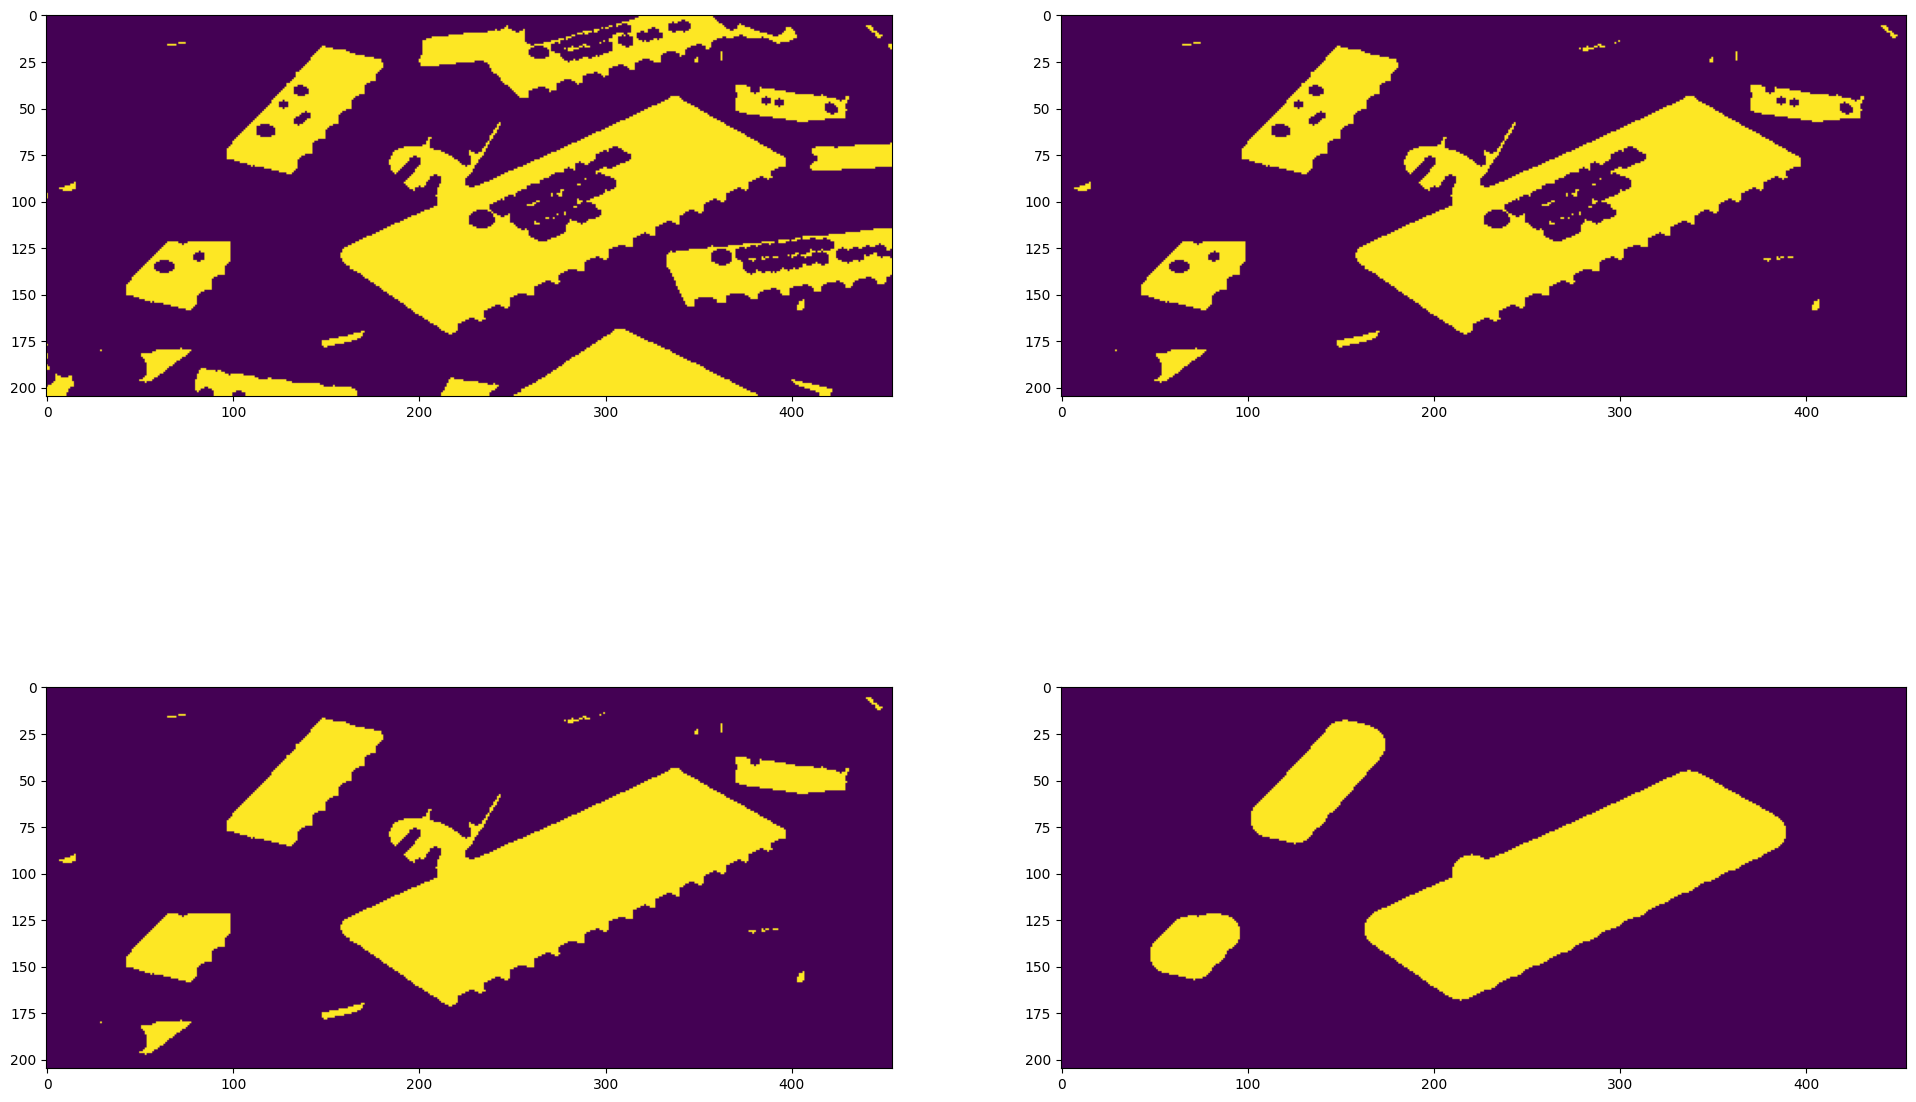

In [42]:
img_gray = cv2.imread("lab_images/comp2.jpg",0)
_,img = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img = cv2.erode(img,selem)
img_e = img.copy() #para mostrar

#Limpieza de bordes
marker=np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)

marker[0,:] = img[0,:]
marker[-1,:] = img[-1,:]
marker[:,0] = img[:,0]
marker[:,-1]= img[:,-1]

img_recons = reconstruccion_morf(img,marker,selem)
g = img-img_recons

#Llenado de huecos
marker2=np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)
marker2[0,:] = ~g[0,:]
marker2[-1,:] = ~g[-1,:]
marker2[:,0] = ~g[:,0]
marker2[:,-1] = ~g[:,-1]

img_recons2 = ~reconstruccion_morf(~g, marker2,selem) #Llenado de huecos

#Apertura
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21,21))
img_recons3= cv2.morphologyEx(img_recons2,cv2.MORPH_OPEN,selem2)

plt.subplots(2,2,figsize=(24,16))
plt.subplot(221)
plt.imshow(img_e)
plt.subplot(222)
plt.imshow(g)
plt.subplot(223)
plt.imshow(img_recons2)
plt.subplot(224)
plt.imshow(img_recons3)
plt.show()

```
10. Como obtendría los integrados segmentados con sus colores rgb a partir del resultado de la imagen anterior?

### 11. Implemente las operaciones morfologicas basicas en tiempo real.

In [ ]:
# cap = cv2.VideoCapture(0)

# selem1 = np.ones((5,5),np.uint8)

# while(1):

#     _, frame = cap.read()
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     lower = np.array([90,100,100])
#     upper = np.array([130,255,255])

#     mask = cv2.inRange(hsv, lower, upper)


#     opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, selem1)
#     closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, selem1)
#     gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, selem1)

#     res = cv2.bitwise_and(frame,frame, mask=closing)

#     cv2.imshow('Original',frame)
#     cv2.imshow('Mask',mask)
#     cv2.imshow('Opening',opening)
#     cv2.imshow('Closing',closing)
#     cv2.imshow('Gradient',gradient)
#     cv2.imshow('Segmentacion',res)

#     k = cv2.waitKey(5) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()
# cap.release()

```
Cada estudiante debe escribir una reflexión propia sobre el aprendizaje obtenido con la presenta guía
```


<nombre integrante 1>: En esta guía aprendí sobre.....









<nombre integrante 2>:









<nombre integrante 3>: 